In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.Import the "Retail_Sales_Data.csv" dataset.

In [6]:
# Step 2: Import the dataset
# Make sure to upload the Retail_Sales_Data.csv file to your Colab environment

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

2. Explore the dataset to understand its structure and content. 

In [8]:
# Step 3: Explore the dataset
print("Dataset Head:")
print(df.head())

Dataset Head:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [9]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [10]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


3. Identify the relevant variables for aggregating sales data, such as region, sales 
amount, and product category.

In [11]:
# Step 4: Identify relevant variables for aggregation
# Check if 'Region' is in the dataset
if 'Region' not in df.columns:
    print("The 'Region' column is not present in the dataset.")
    
    # Assuming 'Product Category' can help in defining a 'Region'
    # For demonstration, we'll create a mock 'Region' column based on product categories.
    # You can customize this logic based on your dataset and requirements.
    
    # Example: Defining regions based on product categories (modify as needed)
    def define_region(row):
        if row['Product Category'] in ['Electronics', 'Appliances']:
            return 'North'
        elif row['Product Category'] in ['Clothing', 'Beauty']:
            return 'South'
        else:
            return 'Other'

    df['Region'] = df.apply(define_region, axis=1)
    print("A new 'Region' column has been created based on product categories.")
else:
    print("The 'Region' column is present in the dataset.")

The 'Region' column is not present in the dataset.
A new 'Region' column has been created based on product categories.


4. Group the sales data by region and calculate the total sales amount for each region.

In [12]:
# Step 5: Group sales data by region to calculate total sales amount
# Grouping by 'Region'
sales_by_region = df.groupby('Region')['Total Amount'].sum().reset_index()

5. Create bar plots or pie charts to visualize the sales distribution by region.

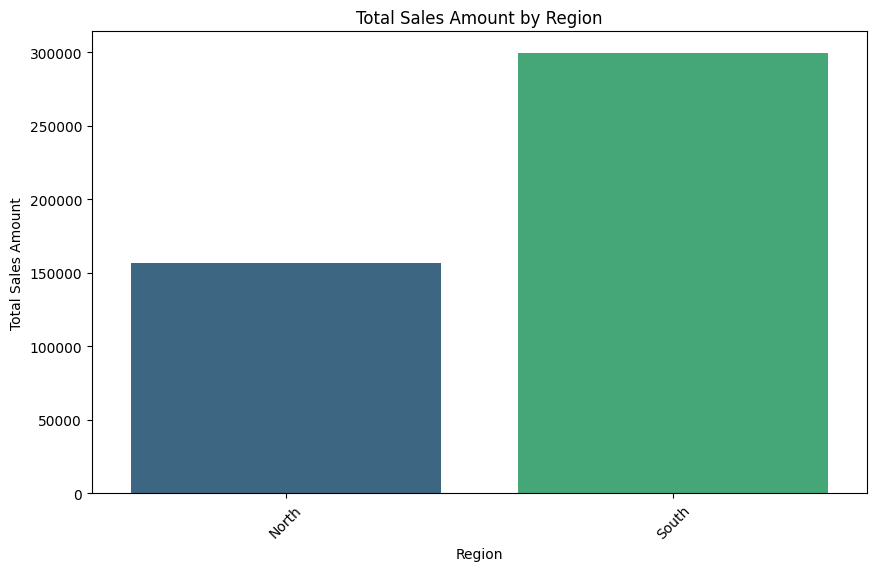

In [16]:
# Step 6: Create bar plots to visualize the sales distribution by region
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_region, x='Region', y='Total Amount', palette='viridis', hue='Region', legend=False)
plt.title('Total Sales Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

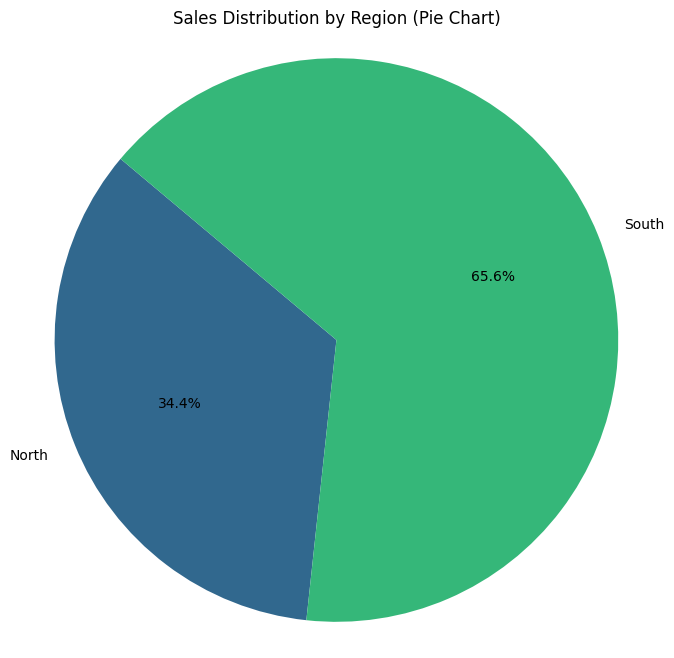

In [17]:
# Step 7: Create a pie chart to visualize the sales distribution by region
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Total Amount'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(sales_by_region)))
plt.title('Sales Distribution by Region (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

6. Identify the top-performing regions based on the highest sales amount. 

In [18]:
# Step 7: Identify the top-performing regions based on the highest sales amount
top_regions = sales_by_region.sort_values(by='Total Amount', ascending=False).head(5)
print("\nTop Performing Regions:")
print(top_regions)


Top Performing Regions:
  Region  Total Amount
1  South        299095
0  North        156905


7. Group the sales data by region and product category to calculate the total sales 
amount for each combination. 

In [19]:
# Step 8: Group sales data by region and product category
sales_by_region_category = df.groupby(['Region', 'Product Category'])['Total Amount'].sum().unstack().fillna(0)

8. Create stacked bar plots or grouped bar plots to compare the sales amounts across 
different regions and product categories. 

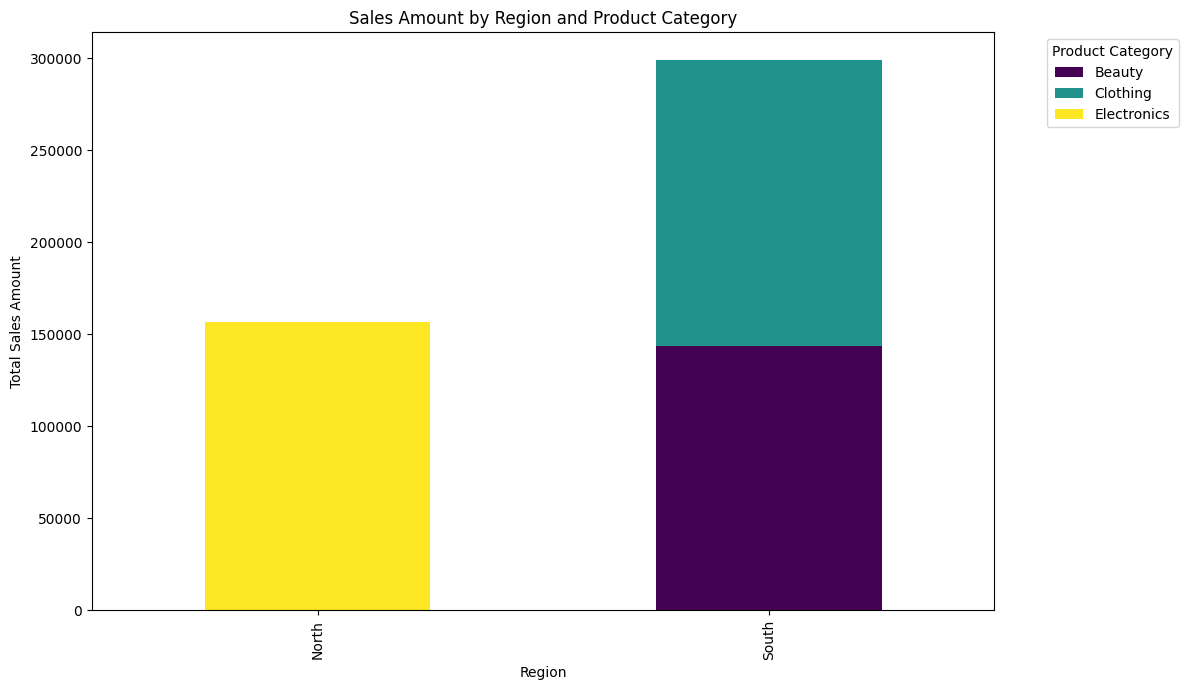

In [20]:
# Step 9: Create stacked bar plots to compare sales amounts across different regions and product categories
sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

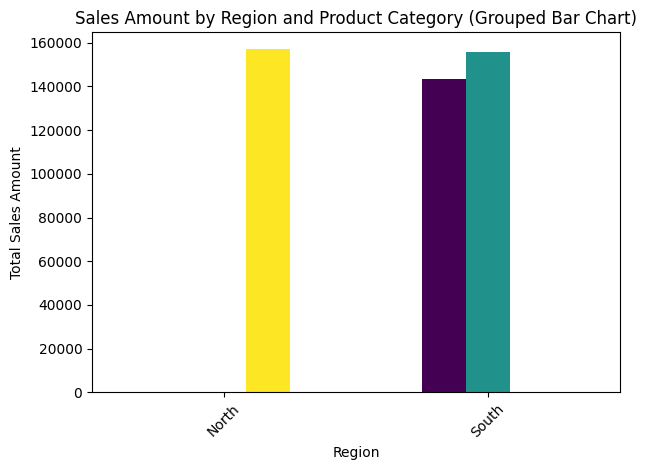

In [21]:
# Create a grouped bar chart to compare sales amounts across different regions and product categories
plt.figure(figsize=(12, 7))
sales_by_region_category.plot(kind='bar', colormap='viridis', legend=False)
plt.title('Sales Amount by Region and Product Category (Grouped Bar Chart)')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()